In [ ]:
import numpy as np
from numba import jit


@jit(nopython=True)
def X_n(n):
  lX=[0]  
  L=np.zeros(2*n+2)
  m,M=0,0
  c=0
  tau=0
  while M-m<n+1:
     u=np.random.random()
     p1,p2=L[n+c-1],L[n+c+1]
     p1=np.exp(-p1)
     p2=np.exp(-p2)
     p1=p1/(p1+p2)
     if u<p1:
         c-=1
         L[n+c]+=1
         m=min(c,m)
     else:
         c+=1
         L[n+c]+=1
         M=max(c,M)
     lX.append(c)
  return lX


@jit(nopython=True)
def Splitting(N,V,n):
       i=np.argmax(N==n)
       j=np.argmax(V[i:]==0)
       # print(i,i+j,N[i+j],N[i])
       # if we have visited the same number of sites when X goes to 0, then a flip happened
       if N[j+i]==N[i] and j!=0:
           return 1
       else:
           return 0
       
@jit(nopython=True)
def Splitting0(N,V,n):
       i=np.where(N>=n)[0][0]
       j=np.where(N>=n+1)[0][0]
       # print(i,j)
       if V[i]*V[j]<=0:
           return 1
       else:
           return 0

In [49]:
np.where(N>=23)[0][0],np.argmax(N==23)

(29, 29)

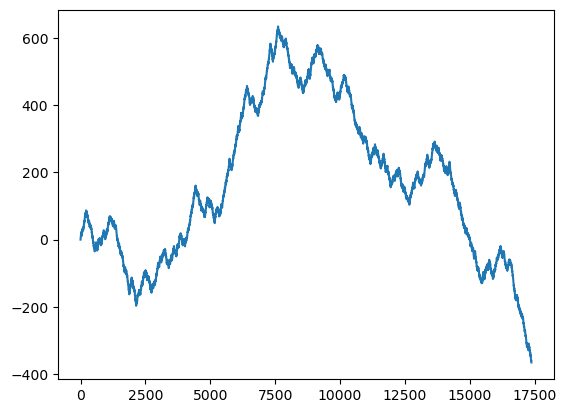

In [52]:
import matplotlib.pyplot as plt
plt.plot(lX)

In [57]:
for u in range(len(listeN)):
    n=listeN[u]
    val=Splitting(N,lX,n)
    if val==1:
        print(val)

In [58]:
listeN=np.int64(np.logspace(1,3,25))

for _ in range(20):
    P=np.zeros(len(listeN))
    C=np.zeros(len(listeN))
    sr=str(np.random.randint(10**5))

    for k in range(10000):
        lX=np.array(X_n(max(listeN)))
        M=np.maximum.accumulate(lX)
        m=np.minimum.accumulate(lX)
        N=M-m
        for u in range(len(listeN)):
            n=listeN[u]
            val=Splitting(N,lX,n)
            if val>=0:
                C[u]+=1
                P[u]+=val
        np.save('C:/Users/julie/Nextcloud/These/Data/persistence in exploration/Donnees Leo/Pi_n/Pi_n/Splitting-alternativedef/TSAW/'+sr,[P,C])